**Movies to Images**

This notebook builds part of our comprehensive dataset to train and test our model on. It systematically analyzes videos frame by frame, employs OpenCV (MTCNN) for facial feature detection, and crops the identified faces within the frames. It does the same for images that we collected for our dataset by hand. Subsequently, the processed data is stored in our dataset, categorized as either Leo or non-Leo.

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy
from scipy import io
import pylab
import imageio
from mtcnn import MTCNN
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# BEFORE RUNNING: Go to 581 Final Project folder -> Click on 3 dots in top right -> Organize -> Add shortcut -> Add to "MyDrive"
%cd "./drive/MyDrive/581 Final Project/Code Workspace/"

/content/drive/.shortcut-targets-by-id/123dBgMojaPHDEEl07lmgMguKJvE4EzOx/581 Final Project/Code Workspace


In [ ]:
# Running decorator to capture the output that would be printed to the standard
# output (stdout) by our function.

from functools import wraps
import sys
import io

def capture_output(func):
    """Wrapper to capture print output."""

    @wraps(func)
    def wrapper(*args, **kwargs):
        old_stdout = sys.stdout
        new_stdout = io.StringIO()
        sys.stdout = new_stdout
        try:
            return func(*args, **kwargs)
        finally:
            sys.stdout = old_stdout

    return wrapper

In [ ]:
# Takes a frame as input, uses the MTCNN model to detect faces in the frame,
# and returns the coordinates (x, y, width, height) of the first detected face
# if its confidence level is above 90%. If no face is detected or the
# confidence is below the threshold, it returns None.

def faceDetection(frame):
    detector = MTCNN()
    intermediate_func = capture_output(detector.detect_faces)
    boxes = intermediate_func(frame)
    if boxes:
        box = boxes[0]['box']
        conf = boxes[0]['confidence']
        if conf > 0.9:
            x, y, w, h = box[0], box[1], box[2], box[3]
            return x, y, w, h
    else:
        return None

In [ ]:
# Movie Capture
# Captures faces from frames of MP4 videos in the "./Movies" directory,
# processing every 8th frame, and saves the detected faces into the "./Images"
# directory, adjusting the face region's dimensions and position within the
# frames.

output_directory = "./Images"
# i is used as an index to count how many images we already have in our dataset,
# and to annotate our new images with its respective id.
i = 857
for video in os.listdir("./Movies"):
    if video.endswith(".mp4"):
        frame_reader = imageio.get_reader("./Movies/" + video,'ffmpeg', mode ='I')
        for frame_num, frame in enumerate(frame_reader):
          # Every 8 frames, capture the face
          if frame_num % 8 == 0:
            detected_face = faceDetection(frame)
            if detected_face != None:
              x, y, w, h = detected_face
              y = max(0, y - 50)
              h = min(y + h + 70, frame.shape[0]) - y
              x = max(0, x - 20)
              w = min(x + w + 60, frame.shape[1]) - x
              cropped_face = Image.fromarray(frame[y:y + h, x:x + w, :])
              save_path = os.path.join(output_directory, f"leo_{i}.jpg")
              cropped_face.save(save_path)
              i += 1

In [ ]:
# Image Capture
# This code processes images in the "./RawImages" directory, detects faces using
# the faceDetection function, adjusts the face region's dimensions and position,
# and saves the cropped faces as JPEG files in the "./Images" directory

output_directory = "./Images"
i = 1086
for image_path in os.listdir("./RawImages"):
  img = Image.open("./RawImages/" + image_path)
  frame = np.array(img.convert('RGB'), 'f')
  detected_faces = faceDetection(frame)
  if detected_faces != None:
    x, y, w, h = detected_faces
    y = max(0, y - 50)
    h = min(y + h + 70, frame.shape[0]) - y
    x = max(0, x - 20)
    w = min(x + w + 60, frame.shape[1]) - x
    cropped_face = img.crop([x, y, x + w, y + h])
    plt.imshow(cropped_face)
    save_path = os.path.join(output_directory, f"leo_{i}.jpg")
    cropped_face.save(save_path)
    i += 1


In [ ]:
os.listdir("./NonLeoMovies")

['y2mate.is - Matthew McConaughey Best Moments-s3uYnE065J8-720p-1700673879.mp4',
 'Top 10 Performances By Jake Gyllenhaal.mp4',
 'Jake Gyllenhaal _Best acting Moments_.mp4',
 'The Best Acting of All Time - Compilation Part I [HD].mp4',
 'The Best Acting of All Time - Compilation Part III [HD].mp4']

In [ ]:
# Non Leo Movie Capture
# Repeating the same process as above for non-Leonardo DiCaprio videos

output_directory = "./non_leonardo_dicaprio"
i = 0
for video in os.listdir("./NonLeoMovies"):
    if video.endswith(".mp4"):
        frame_reader = imageio.get_reader("./NonLeoMovies/" + video,'ffmpeg', mode ='I')
        for frame_num, frame in enumerate(frame_reader):
          # Every 130 frames, capture the face
          if frame_num % 130 == 0:
            detected_face = faceDetection(frame)
            if detected_face != None:
              x, y, w, h = detected_face
              y = max(0, y - 50)
              h = min(y + h + 70, frame.shape[0]) - y
              x = max(0, x - 20)
              w = min(x + w + 60, frame.shape[1]) - x
              cropped_face = Image.fromarray(frame[y:y + h, x:x + w, :])
              save_path = os.path.join(output_directory, f"not_leo_{i}.jpg")
              cropped_face.save(save_path)
              i += 1

In [ ]:
# Non Leo Image Capture
# Repeating the same process as above for non-Leo images

output_directory = "./non_leonardo_dicaprio"
i = 1041
for image_path in os.listdir("./NonLeoPhotos"):
  img = Image.open("./NonLeoPhotos/" + image_path)
  frame = np.array(img.convert('RGB'), 'f')
  detected_faces = faceDetection(frame)
  if detected_faces != None:
    x, y, w, h = detected_faces
    y = max(0, y - 50)
    h = min(y + h + 70, frame.shape[0]) - y
    x = max(0, x - 20)
    w = min(x + w + 60, frame.shape[1]) - x
    cropped_face = img.crop([x, y, x + w, y + h])
    plt.imshow(cropped_face)
    cropped_face = cropped_face.convert('RGB')
    save_path = os.path.join(output_directory, f"not_leo_{i}.jpg")
    cropped_face.save(save_path)
    i += 1


(126, 152, 255, 332)
(139, 127, 229, 313)
(57, 67, 99, 130)


KeyboardInterrupt: ignored

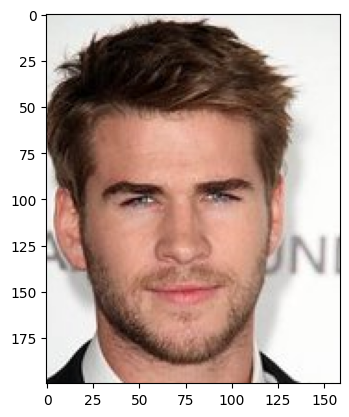

In [ ]:
# Suppress output test

for image_path in os.listdir("./NonLeoPhotos"):
  img = Image.open("./NonLeoPhotos/" + image_path)
  frame = np.array(img.convert('RGB'), 'f')
  detected_faces = faceDetection(frame)
  if detected_faces != None:
    x, y, w, h = detected_faces
    print(detected_faces)
    y = max(0, y - 50)
    h = min(y + h + 70, frame.shape[0]) - y
    x = max(0, x - 20)
    w = min(x + w + 60, frame.shape[1]) - x
    cropped_face = img.crop([x, y, x + w, y + h])
    plt.imshow(cropped_face)
    cropped_face = cropped_face.convert('RGB')
